# scikit-learn

In the following notebook, we repeat the experiments conducted in the previous notebooks, however, instead of writing our own implementation `scikit-learn` methods were used.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

## Univariate linear regression

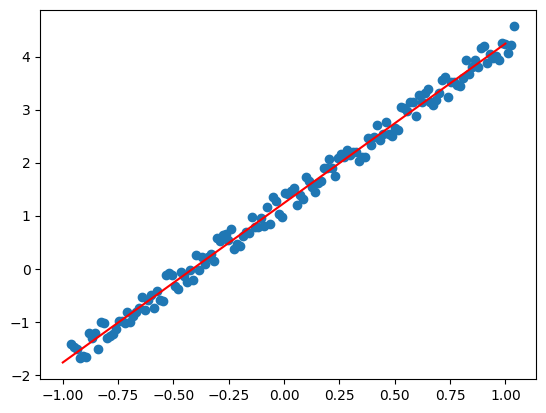

Score: 0.9928043727518167


In [2]:
np.random.seed(42)

x = np.linspace(-1, 1, 150) + .1 * np.random.rand(1)
x = x.reshape(-1, 1)
y = 3 * x + 1 + 0.5 * np.random.rand(x.shape[0]).reshape(x.shape)

reg = linear_model.LinearRegression().fit(x, y)

fig, ax = plt.subplots()
lin = np.linspace(-1, 1, 10).reshape(-1, 1)
ax.scatter(x, y)
ax.plot(lin, reg.predict(lin), 'r-')
plt.show()

print(f"Score: {reg.score(x, y)}")

## Multivariate linear regression

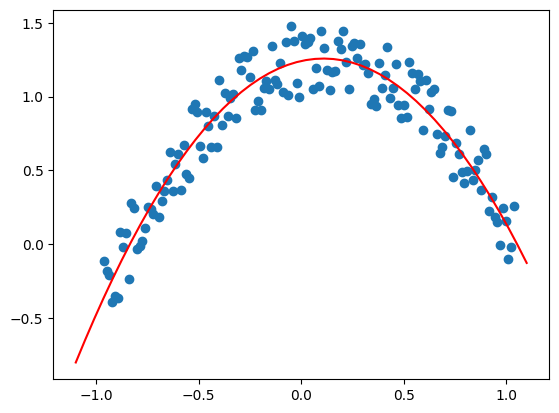

Score: 0.8981023072480799


In [3]:
np.random.seed(42)

x = np.linspace(-1, 1, 150) + .1 * np.random.rand(1)
x = x.reshape(-1, 1)
y = -1.4 * x ** 2 + 0.3 * x + 1 + 0.5 * np.random.rand(x.shape[0]).reshape(x.shape)

X = np.hstack((x, x ** 2))

reg = linear_model.LinearRegression().fit(X, y)

fig, ax = plt.subplots()
lin = np.linspace(-1.1, 1.1, 50).reshape(-1, 1)
ax.scatter(x, y)
ax.plot(lin, reg.predict(np.hstack((lin, lin ** 2))), 'r-')
plt.show()

print(f"Score: {reg.score(X, y)}")

## Logistic regression

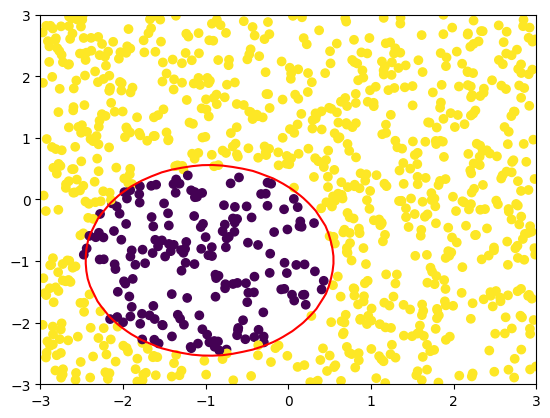

Score: 0.992


In [4]:
np.random.seed(42)
samples = 1000
r, a0, a1 = 1.5, -1, -1

x = 6 * np.random.rand(samples, 2) - 3
y = ((x[:, 0] - a0)**2 + (x[:, 1] - a1) ** 2 > r * r).astype(int)
X = np.hstack((x, x ** 2))

reg = linear_model.LogisticRegression(penalty=None, tol=10)
reg.fit(X, y)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=y)

sx, sy = 50, 50
p = np.linspace(-3, 3, sx)
q = np.linspace(-3, 3, sy)
P, Q = np.meshgrid(p, q)
PQ = np.hstack((P.flatten().reshape(-1, 1), Q.flatten().reshape(-1, 1)))
PQ = np.hstack((PQ, PQ ** 2))
plt.contour(P, Q, reg.predict_proba(PQ)[:, 1].reshape(sx, sy), levels=[0.5], colors = ["red"])

plt.show()

print(f"Score: {reg.score(X, y)}")

## Regularization

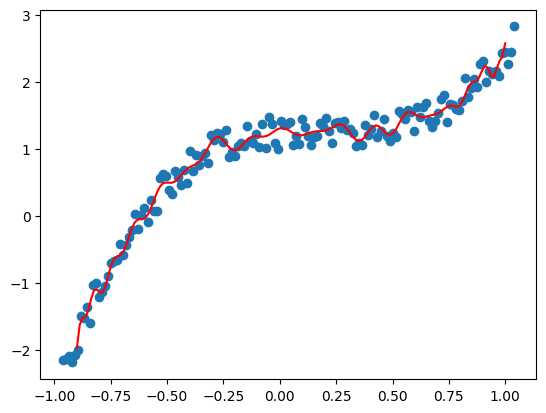

Score: 0.9863071507465238


In [5]:
np.random.seed(42)

def poly_stack(x, deg):
    return np.hstack([x ** i for i in range(1, deg + 1)])

x = np.linspace(-1, 1, 150) + .1 * np.random.rand(1)
x = x.reshape(-1, 1)
y = 2.3 * x ** 3 + (-1.4) * x ** 2 + 0.3 * x + 1 + 0.5 * np.random.rand(x.shape[0]).reshape(x.shape)

deg = 50
X = poly_stack(x, deg)

reg = linear_model.Ridge(alpha=0.0).fit(X, y)

fig, ax = plt.subplots()
lin = np.linspace(-0.9, 1., 150).reshape(-1, 1)
ax.scatter(x, y)
ax.plot(lin, reg.predict(poly_stack(lin, deg)), 'r-')
plt.show()

print(f"Score: {reg.score(X, y)}")

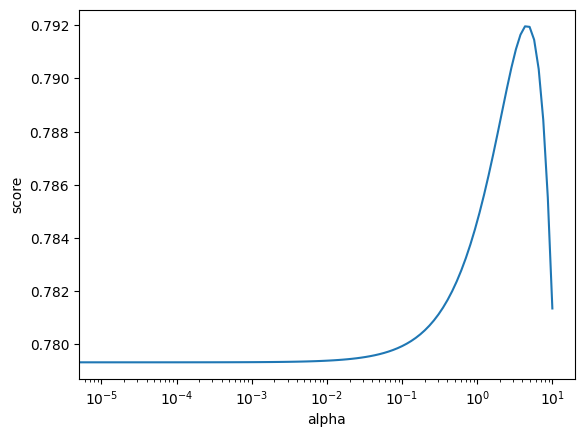

In [6]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

scores = []
for alpha in [0] + list(np.logspace(-5, 1, 100)):
    reg = linear_model.Ridge(alpha=alpha).fit(x_train, y_train)
    scores.append([alpha, reg.score(x_test, y_test)])
scores = np.array(scores)

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.plot(scores[:, 0], scores[:, 1])
ax.set_xlabel('alpha')
ax.set_ylabel('score')
plt.show()

## Neural network



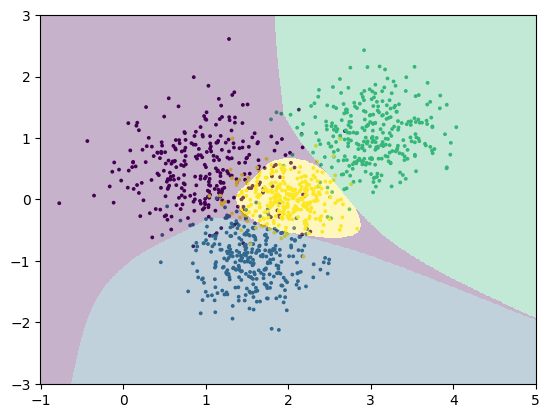

In [7]:
class_size = 300
samples = 4 * class_size

np.random.seed(42)
x = np.vstack((
    np.random.multivariate_normal(mean=[1, 0.5], cov=[[0.3, 0],[0, 0.3]], size=class_size),
    np.random.multivariate_normal(mean=[1.5, -1], cov=[[0.15, 0],[0, 0.15]], size=class_size),
    np.random.multivariate_normal(mean=[3, 1], cov=[[0.2, 0],[0, 0.2]], size=class_size),
    np.random.multivariate_normal(mean=[2, 0], cov=[[0.1, 0],[0, 0.1]], size=class_size),
))
c = np.zeros((samples, 1))
y = np.zeros((samples, 4))

c[0 * class_size : 1 * class_size] = 0
c[1 * class_size : 2 * class_size] = 1
c[2 * class_size : 3 * class_size] = 2
c[3 * class_size : 4 * class_size] = 3

y[0 * class_size : 1 * class_size, 0] = 1
y[1 * class_size : 2 * class_size, 1] = 1
y[2 * class_size : 3 * class_size, 2] = 1
y[3 * class_size : 4 * class_size, 3] = 1

clf = MLPClassifier(
    activation="logistic", 
    alpha=1e-3, 
    hidden_layer_sizes=(10, 10, 10), 
    random_state=42,
    max_iter=10_000, 
    tol=1e-9
    ).fit(x, y)

V, W = np.meshgrid(
    np.linspace(-1, 5, 500), 
    np.linspace(-3, 3, 500)
)
VW = np.hstack((V.flatten().reshape(-1, 1), W.flatten().reshape(-1, 1)))
H = np.argmax(clf.predict(VW), axis=1).reshape(V.shape)

fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], c=c, s=3)
ax.pcolormesh(V, W, H, alpha=0.3)
plt.show()

## Cross validation

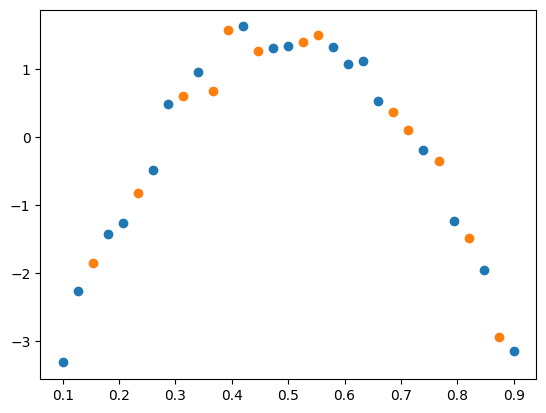

In [8]:
np.random.seed(42)

samples = 31
x = np.linspace(.1, .9, samples).reshape(-1, 1)
y = -30 * (x - 0.3) * (x - 0.7) + 0.75 * np.random.rand(samples, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

fig, ax = plt.subplots()
ax.scatter(x_train, y_train)
ax.scatter(x_test, y_test)
plt.show()


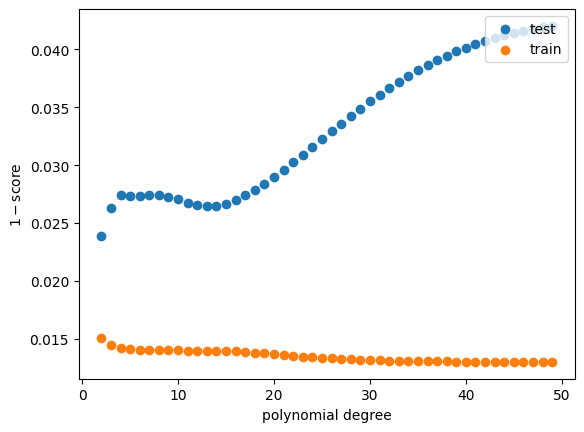

In [9]:
fig, ax = plt.subplots()

score_test = []
score_train = []
for i in range(2, 50):
    reg = linear_model.Ridge(alpha=1e-6, max_iter=10_000).fit(poly_stack(x_train, i), y_train)
    score_test.append([i, reg.score(poly_stack(x_test, i), y_test)])
    score_train.append([i, reg.score(poly_stack(x_train, i), y_train)])
score_test = np.array(score_test)
score_train = np.array(score_train)

ax.set_xlabel("polynomial degree")
ax.set_ylabel(r"$1-\mathrm{score}$")
ax.scatter(score_test[:, 0], 1-score_test[:, 1], label=r'test')
ax.scatter(score_train[:, 0], 1-score_train[:, 1], label=r'train')
ax.legend(loc='upper right')
plt.show()